## Importing Library

In [ ]:
# prediction
def check_correct(predict, y):
    result = {}
    result['cancer-correct'] = 0
    result['cancer-wrong'] = 0
    result['normal-correct'] = 0
    result['normal-wrong'] = 0

    for i in range(len(predict)) :
        if predict[i] == y[i] :
            if y[i] == 0 :
                result['normal-correct'] += 1
            else :
                result['cancer-correct'] += 1
        else :
            if y[i] == 0 :
                result['normal-wrong'] += 1
            else :
                result['cancer-wrong'] += 1

    for result_k, result_v in result.items():
        print(result_k +" : "+ str(result_v))
    sensitivity=result['cancer-correct']/(result['cancer-correct']+result['cancer-wrong'])
    specificity=result['normal-correct']/(result['normal-correct']+result['normal-wrong'])
    print("Sensitivity :", sensitivity)
    print("Specificity :", specificity)
    return sensitivity, specificity

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

## Import Data

In [92]:
path = "C://test/TCGA_with_GEO/"
types = ["TCGA_with_GEO_input_ensemble_CV_3000", "TCGA_with_GEO_input_ensemble_foundation_308",
         "TCGA_with_GEO_input_ensemble_foundation_2267", "TCGA_with_GEO_input_ensemble_Mean_3000",
         "TCGA_with_GEO_input_ensemble_VAR_3000"
         ]
idx_col = 0

[1] file_name:  C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_VAR_3000.csv 
sample : 26248  
features : 3003
[2] file_name:  C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_CV_3000.csv 
sample : 26248  
features : 3003
[3] file_name:  C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_foundation_308.csv 
sample : 26248  
features : 311


'\nprint("[4] file_name: ", file_4, "\nsample : {}  \nfeatures : {}".format(sample_4,features_4))\nprint("[5] file_name: ", file_5, "\nsample : {}  \nfeatures : {}".format(sample_5,features_5))\nprint("[6] file_name: ", file_6, "\nsample : {}  \nfeatures : {}".format(sample_6,features_6))\n'

In [ ]:
file_1 = path+types[4]+".csv"
data_1 = pd.read_csv(file_1,index_col=idx_col)
sample_1,features_1 = data_1.shape
print("[1] file_name: ", file_1, "\nsample : {}  \nfeatures : {}".format(sample_1,features_1))
data_1.iloc[0:5, 0:5]

In [ ]:
file_2 = path+types[0]+".csv"
data_2 = pd.read_csv(file_2,index_col=idx_col)
sample_2,features_2 = data_2.shape
print("[2] file_name: ", file_2, "\nsample : {}  \nfeatures : {}".format(sample_2,features_2))
data_2.iloc[0:5, 0:5]

In [ ]:
file_3 = path+types[1]+".csv"
data_3 = pd.read_csv(file_3,index_col=idx_col)
sample_3,features_3 = data_3.shape
print("[3] file_name: ", file_3, "\nsample : {}  \nfeatures : {}".format(sample_3,features_3))
data_1.iloc[0:5, 0:5]

## Split Train Test Data

In [94]:
train_p_ids = list(pd.read_csv(path+"Train_14_index.csv").x)
test_p_ids = list(pd.read_csv(path+"Test_14_index.csv").x)

In [95]:
train_data_1 = data_1.iloc[train_p_ids]
test_data_1 = data_1.iloc[test_p_ids]
y_val_1 = train_data_1.result
x_val_1 = train_data_1.drop(["cancer_code","result","index"],axis=1)
test_y_val_1 = test_data_1.result
test_x_val_1 = test_data_1.drop(["cancer_code","result","index"],axis=1)

In [96]:
train_data_2 = data_2.iloc[train_p_ids]
test_data_2 = data_2.iloc[test_p_ids]
y_val_2 = train_data_2.result
x_val_2 = train_data_2.drop(["cancer_code","result","index"],axis=1)
test_y_val_2 = test_data_2.result
test_x_val_2 = test_data_2.drop(["cancer_code","result","index"],axis=1)

In [97]:
train_data_3 = data_3.iloc[train_p_ids]
test_data_3 = data_3.iloc[test_p_ids]
y_val_3 = train_data_3.result
x_val_3 = train_data_3.drop(["cancer_code","result","index"],axis=1)
test_y_val_3 = test_data_3.result
test_x_val_3 = test_data_3.drop(["cancer_code","result","index"],axis=1)

## Modeling Seperate Model

###  Building seperate model for ensemble(model 1, 2, 3)

In [98]:
from keras.layers import Input, Dense
from keras.models import Model
keep_prob = 0.5

"\nm1 = Sequential()\nm1.add(Dense(features_1-2, input_dim = sample_1 * (features_1-2), activation='relu', init='glorot_uniform'))\nm1.add(Dropout(0.5))\nm1.add(Dense(150, activation='relu'))\nm1.add(Dropout(0.5))\nm1.add(Dense(200, activation='relu'))\nm1.add(Dropout(0.5))\nm1.add(Dense(300, activation='relu'))\nm1.add(Dropout(0.5))\nm1.add(Dense(150, activation='relu'))\nm1.add(Dropout(0.5))\nm1.add(Dense(1, activation='sigmoid'))\n\nprint(features_1-3, features_2-3, features_3-3)\n"

In [99]:
input_m1 = Input(shape=(features_1-3,))
Sequential

input_drop_m1 = Dropout(keep_prob)(input_m1)
h1_m1 = Dense(500,activation='relu')(input_drop_m1)
h1_m1 = Dropout(keep_prob)(h1_m1)
h2_m1 = Dense(500,activation='relu')(h1_m1)
h2_m1 = Dropout(keep_prob)(h2_m1)
h3_m1 = Dense(200,activation='relu')(h2_m1) 
h3_m1 = Dropout(keep_prob)(h3_m1)
h4_m1 = Dense(300,activation='relu')(h3_m1) 
h4_m1 = Dropout(keep_prob)(h4_m1)
h5_m1 = Dense(200,activation='relu')(h4_m1) 
h5_m1 = Dropout(keep_prob)(h5_m1)
h6_m1 = Dense(100,activation='relu')(h5_m1) 
h6_m1 = Dropout(keep_prob)(h6_m1)
output_m1 = Dense(1,activation="sigmoid")(h6_m1) 
model1 = Model(inputs=input_m1,outputs=output_m1)

model1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model1.fit(x_val_1, y_val_1, epochs=30, callbacks=[early_stopping])

model1.save("DNN_model_1.h5")
print("Model1 saved model to disk")
print("[1] file_name: ", file_1, "\nsample : {}  \nfeatures : {}".format(sample_1,features_1))

Epoch 1/30
13123/13123 [==============================] - 79s 6ms/step - loss: 0.7975 - acc: 0.5169
Epoch 2/30
   96/13123 [..............................] - ETA: 25s - loss: 0.6706 - acc: 0.5521

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


13123/13123 [==============================] - 26s 2ms/step - loss: 0.3727 - acc: 0.8414
Epoch 3/30
13123/13123 [==============================] - 23s 2ms/step - loss: 0.2392 - acc: 0.9089
Epoch 4/30
13123/13123 [==============================] - 23s 2ms/step - loss: 0.2161 - acc: 0.9172
Epoch 5/30
13123/13123 [==============================] - 22s 2ms/step - loss: 0.1973 - acc: 0.9233
Epoch 6/30
13123/13123 [==============================] - 22s 2ms/step - loss: 0.1879 - acc: 0.9313
Epoch 7/30
13123/13123 [==============================] - 22s 2ms/step - loss: 0.1837 - acc: 0.9309
Epoch 8/30
13123/13123 [==============================] - 22s 2ms/step - loss: 0.1685 - acc: 0.9374
Epoch 9/30
13123/13123 [==============================] - 19s 1ms/step - loss: 0.1657 - acc: 0.9398
Epoch 10/30
13123/13123 [==============================] - 19s 1ms/step - loss: 0.1568 - acc: 0.9409
Epoch 11/30
13123/13123 [==============================] - 18s 1ms/step - loss: 0.1539 - acc: 0.9403
Epoch 12/

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [100]:
input_m2 = Input(shape=(features_2-3,))
input_drop_m2 = Dropout(keep_prob)(input_m2)
h1_m2 = Dense(500,activation='relu')(input_drop_m2)
h1_m2 = Dropout(keep_prob)(h1_m2)
h2_m2 = Dense(500,activation='relu')(h1_m2)
h2_m2 = Dropout(keep_prob)(h2_m2)
h3_m2 = Dense(200,activation='relu')(h2_m2) 
h3_m2 = Dropout(keep_prob)(h3_m2)
h4_m2 = Dense(300,activation='relu')(h3_m2) 
h4_m2 = Dropout(keep_prob)(h4_m2)
h5_m2 = Dense(200,activation='relu')(h4_m2) 
h5_m2 = Dropout(keep_prob)(h5_m2)
h6_m2 = Dense(100,activation='relu')(h5_m2) 
h6_m2 = Dropout(keep_prob)(h6_m2)
output_m2 = Dense(1,activation="sigmoid")(h6_m2) 
model2 = Model(inputs=input_m2,outputs=output_m2)

model2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(x_val_2, y_val_2, epochs=25, callbacks=[early_stopping])

model2.save("DNN_model_2.h5")
print("Model2 saved model to disk")
print("[2] file_name: ", file_2, "\nsample : {}  \nfeatures : {}".format(sample_2,features_2))

Epoch 1/25
13123/13123 [==============================] - 25s 2ms/step - loss: 0.7278 - acc: 0.5864
Epoch 2/25
   96/13123 [..............................] - ETA: 20s - loss: 0.3698 - acc: 0.8542

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


13123/13123 [==============================] - 17s 1ms/step - loss: 0.2880 - acc: 0.8866
Epoch 3/25
13123/13123 [==============================] - 17s 1ms/step - loss: 0.2242 - acc: 0.9169
Epoch 4/25
13123/13123 [==============================] - 19s 1ms/step - loss: 0.1896 - acc: 0.9241: 2s -
Epoch 5/25
13123/13123 [==============================] - 21s 2ms/step - loss: 0.1828 - acc: 0.9329
Epoch 6/25
13123/13123 [==============================] - 18s 1ms/step - loss: 0.1596 - acc: 0.9429
Epoch 7/25
13123/13123 [==============================] - 18s 1ms/step - loss: 0.1589 - acc: 0.9422
Epoch 8/25
13123/13123 [==============================] - 18s 1ms/step - loss: 0.1474 - acc: 0.9464: 1s - loss: 0.1
Epoch 9/25
13123/13123 [==============================] - 17s 1ms/step - loss: 0.1452 - acc: 0.9467
Epoch 10/25
13123/13123 [==============================] - 17s 1ms/step - loss: 0.1344 - acc: 0.9473
Epoch 11/25
13123/13123 [==============================] - 17s 1ms/step - loss: 0.1364 -

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


In [101]:
input_m3 = Input(shape=(features_3-3,))
input_drop_m3 = Dropout(keep_prob)(input_m3)
h1_m3 = Dense(500,activation='relu')(input_drop_m3)
h1_m3 = Dropout(keep_prob)(h1_m3)
h2_m3 = Dense(500,activation='relu')(h1_m3)
h2_m3 = Dropout(keep_prob)(h2_m3)
h3_m3 = Dense(200,activation='relu')(h2_m3) 
h3_m3 = Dropout(keep_prob)(h3_m3)
h4_m3 = Dense(300,activation='relu')(h3_m3) 
h4_m3 = Dropout(keep_prob)(h4_m3)
h5_m3 = Dense(200,activation='relu')(h4_m3) 
h5_m3 = Dropout(keep_prob)(h5_m3)
h6_m3 = Dense(100,activation='relu')(h5_m3) 
h6_m3 = Dropout(keep_prob)(h6_m3)
output_m3 = Dense(1,activation="sigmoid")(h6_m3) 
model3 = Model(inputs=input_m3,outputs=output_m3)

model3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(x_val_3, y_val_3, epochs=21, callbacks=[early_stopping])

model3.save("DNN_model_3.h5")
print("Model3 saved model to disk")
print("[3] file_name: ", file_3, "\nsample : {}  \nfeatures : {}".format(sample_3,features_3))

Epoch 1/21
13123/13123 [==============================] - 12s 945us/step - loss: 0.7279 - acc: 0.5169
Epoch 2/21
  288/13123 [..............................] - ETA: 9s - loss: 0.6544 - acc: 0.5938 

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\callbacks.py:535: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


13123/13123 [==============================] - 10s 748us/step - loss: 0.4446 - acc: 0.8004
Epoch 3/21
13123/13123 [==============================] - 10s 747us/step - loss: 0.3580 - acc: 0.8571
Epoch 4/21
13123/13123 [==============================] - 10s 741us/step - loss: 0.3254 - acc: 0.8638
Epoch 5/21
13123/13123 [==============================] - 10s 730us/step - loss: 0.3038 - acc: 0.8781
Epoch 6/21
13123/13123 [==============================] - 10s 741us/step - loss: 0.2931 - acc: 0.8798
Epoch 7/21
13123/13123 [==============================] - 9s 677us/step - loss: 0.2806 - acc: 0.8842
Epoch 8/21
13123/13123 [==============================] - 9s 700us/step - loss: 0.2843 - acc: 0.8846
Epoch 9/21
13123/13123 [==============================] - 10s 766us/step - loss: 0.2822 - acc: 0.8897
Epoch 10/21
13123/13123 [==============================] - 11s 808us/step - loss: 0.2746 - acc: 0.8903
Epoch 11/21
13123/13123 [==============================] - 9s 719us/step - loss: 0.2715 - acc:

c:\users\hgh97\appdata\local\programs\python\python35\lib\site-packages\keras\engine\saving.py:126: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


### Evaluating seperate model's performance

In [102]:
#model1_new=loaded_model1
#model1_new.compile(optimizer=tf.train.AdamOptimizer(), 
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

m1_tr_loss,m1_tr_accuracy=model1.evaluate(x_val_1,y_val_1)
m2_tr_loss,m2_tr_accuracy=model2.evaluate(x_val_2,y_val_2)
m3_tr_loss,m3_tr_accuracy=model3.evaluate(x_val_3,y_val_3)

m1_loss,m1_accuracy= model1.evaluate(test_x_val_1,test_y_val_1)
m2_loss,m2_accuracy= model2.evaluate(test_x_val_2,test_y_val_2)
m3_loss,m3_accuracy= model3.evaluate(test_x_val_3,test_y_val_3)

#m1_tr_loss_new,m1_tr_accuracy_new=model1_new.evaluate(x_val_1,y_val_1)
#m1_loss_new,m1_accuracy_new= model1_new.evaluate(test_x_val_1,test_y_val_1)

print(file_1,file_2,file_3)
print("\nTrain Accuracy for model 1, 2, 3 : {},{},{}".format(m1_tr_accuracy,m2_tr_accuracy,m3_tr_accuracy))
print("\nTest Accuracy for model 1, 2, 3 : {},{},{}".format(m1_accuracy,m2_accuracy,m3_accuracy))

13125/13125 [==============================] - 4s 269us/step
C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_VAR_3000.csv C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_CV_3000.csv C://test/TCGA_with_GEO/TCGA_with_GEO_input_ensemble_foundation_308.csv

Train Accuracy for model 1, 2, 3 : 0.9742436942772232,0.985826411643679,0.946887144707765

Test Accuracy for model 1, 2, 3 : 0.9636571428571429,0.971047619047619,0.9372952380952381


## Modeling Ensemble model

### Building original ensemble model

In [103]:
m1_predictions = model1.predict(x_val_1)
m2_predictions = model2.predict(x_val_2)
m3_predictions = model3.predict(x_val_3)

ensemble_x_val = np.concatenate([m1_predictions, m2_predictions, m3_predictions], axis=1)

ensemble_model = keras.Sequential([
    keras.layers.Dense(3,input_shape=(3,),name="input_layer"),
    keras.layers.Dense(2,activation="relu"),        
    keras.layers.Dense(1,activation='sigmoid',name="output_layer")])

ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

ensemble_model.fit(ensemble_x_val, y_val_1, epochs=5, batch_size= 1)

ensemble_model.save("ensemble_DNN.h5")

Epoch 1/5
13123/13123 [==============================]13123/13123 [==============================] - 32s 2ms/step - loss: 0.1254 - acc: 0.9726

Epoch 2/5
13123/13123 [==============================]13123/13123 [==============================] - 27s 2ms/step - loss: 0.0481 - acc: 0.9818

Epoch 3/5
13123/13123 [==============================]13123/13123 [==============================] - 29s 2ms/step - loss: 0.0436 - acc: 0.9845

Epoch 4/5
13123/13123 [==============================]13123/13123 [==============================] - 30s 2ms/step - loss: 0.0415 - acc: 0.9848

Epoch 5/5
13123/13123 [==============================]13123/13123 [==============================] - 35s 3ms/step - loss: 0.0407 - acc: 0.9844



In [112]:
ensemble_model.save("ensemble_DNN.h5")

### Evaluating _DNN Combiner_ ensemble model

In [104]:
m1_test_predictions = model1.predict(test_x_val_1)
m2_test_predictions = model2.predict(test_x_val_2)
m3_test_predictions = model3.predict(test_x_val_3)

ensemble_test_x_val = np.concatenate([m1_test_predictions, m2_test_predictions, m3_test_predictions], axis=1)

em_loss,em_accuracy= ensemble_model.evaluate(ensemble_test_x_val,test_y_val_1)

print("Accuracy for DNN combiner ensemble : {}".format(em_accuracy))

13125/13125 [==============================]13125/13125 [==============================] - 1s 96us/step

Accuracy for DNN combiner ensemble : 0.9702095238095239


### Evaluating _mean_ ensemble model

In [105]:
mean_predictions=(m1_test_predictions+m2_test_predictions+m3_test_predictions)/3
labled_predictions = np.where(mean_predictions > 0.5, 1, 0).flatten()
mean_em_accuracy = sum(labled_predictions==test_y_val_1.values)/len(test_y_val_1)

print("Accuracy for mean ensemble : {}".format(mean_em_accuracy))

Accuracy for mean ensemble : 0.9701333333333333


## Transferred Ensemble Modeling 

### Making new input data for t-ensemble

In [106]:
from keras.models import Model
model = Model(inputs=[input_m1], outputs=[h6_m1])
results_m1 = model.predict([x_val_1])

model = Model(inputs=[input_m2], outputs=[h6_m2])
results_m2 = model.predict([x_val_2])

model = Model(inputs=[input_m3], outputs=[h6_m3])
results_m3 = model.predict([x_val_3])

t_ensemble_x_val = np.concatenate([results_m1, results_m2, results_m3], axis=1)
print(t_ensemble_x_val.shape)

(13123, 300)


### Modeling t-ensemble  

In [107]:
t_ensemble_input = Input(shape=(t_ensemble_x_val.shape[1],))
t_ensemble_h1 = Dense(20,activation='relu')(t_ensemble_input)
t_ensemble_h2 = Dense(10,activation='relu')(t_ensemble_h1)
t_ensemble_h3 = Dense(5,activation='relu')(t_ensemble_h2)
t_ensemble_output = Dense(1,activation='sigmoid')(t_ensemble_h3)

t_ensemble_model = Model(inputs=[t_ensemble_input],outputs=[t_ensemble_output])
t_ensemble_model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

t_ensemble_model.fit(t_ensemble_x_val, y_val_1, epochs=2,batch_size=5)

Epoch 1/2
13123/13123 [==============================] - 9s 648us/step - loss: 0.0586 - acc: 0.9841
Epoch 2/2
13123/13123 [==============================] - 7s 515us/step - loss: 0.0351 - acc: 0.9874


### Evaluating t-ensemble

In [108]:
model = Model(inputs=[input_m1], outputs=[h6_m1])
test_results_m1 = model.predict([test_x_val_1])
model = Model(inputs=[input_m2], outputs=[h6_m2])
test_results_m2 = model.predict([test_x_val_2])
model = Model(inputs=[input_m3], outputs=[h6_m3])
test_results_m3 = model.predict([test_x_val_3])

t_ensemble_test_x_val = np.concatenate([test_results_m1, test_results_m2, test_results_m3], axis=1)
t_em_accuracy = t_ensemble_model.evaluate(t_ensemble_test_x_val,test_y_val_1)[1]
print("\nAccuracy for t-ensemble: ",t_em_accuracy )

13125/13125 [==============================] - 2s 137us/step

Accuracy for t-ensemble:  0.9731809523809524


## Performance Comparison

In [109]:
label = ["model1","model2","model3","mean-em","d-comb em","t-em"]
accuracy = [m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy ]
print("model1: "+str(accuracy[0])+"\nmodel2: "+str(accuracy[1])+"\nmodel3: "+str(accuracy[2])+"\nmean-em: "+str(accuracy[3])+"\nd-comb em: "+str(accuracy[4])+"\nt-em: "+str(accuracy[5]))

model1: 0.9636571428571429
model2: 0.971047619047619
model3: 0.9372952380952381
mean-em: 0.9701333333333333
d-comb em: 0.9702095238095239
t-em: 0.9731809523809524


In [110]:
def plot_bar_x():
    # this is for plotting purpose
    plt.figure(figsize=(30,20))
    axes = plt.gca()
    axes.set_ylim([min(m1_accuracy,m2_accuracy,m3_accuracy,mean_em_accuracy,em_accuracy,t_em_accuracy)-0.02,1])
    index = np.arange(len(label))
    plt.bar(index, accuracy,color=['red', 'orange', 'yellow', "green",'blue', 'purple',],alpha=0.5,width=0.3)
    plt.xlabel('Method', fontsize=35)
    plt.ylabel('Accuracy', fontsize=35)
    plt.yticks(fontsize=30)    
    plt.xticks(index, label, fontsize=30, rotation=90)
    plt.title('Performance Comparison for each Ensemble Model',fontsize=40)
    plt.show()

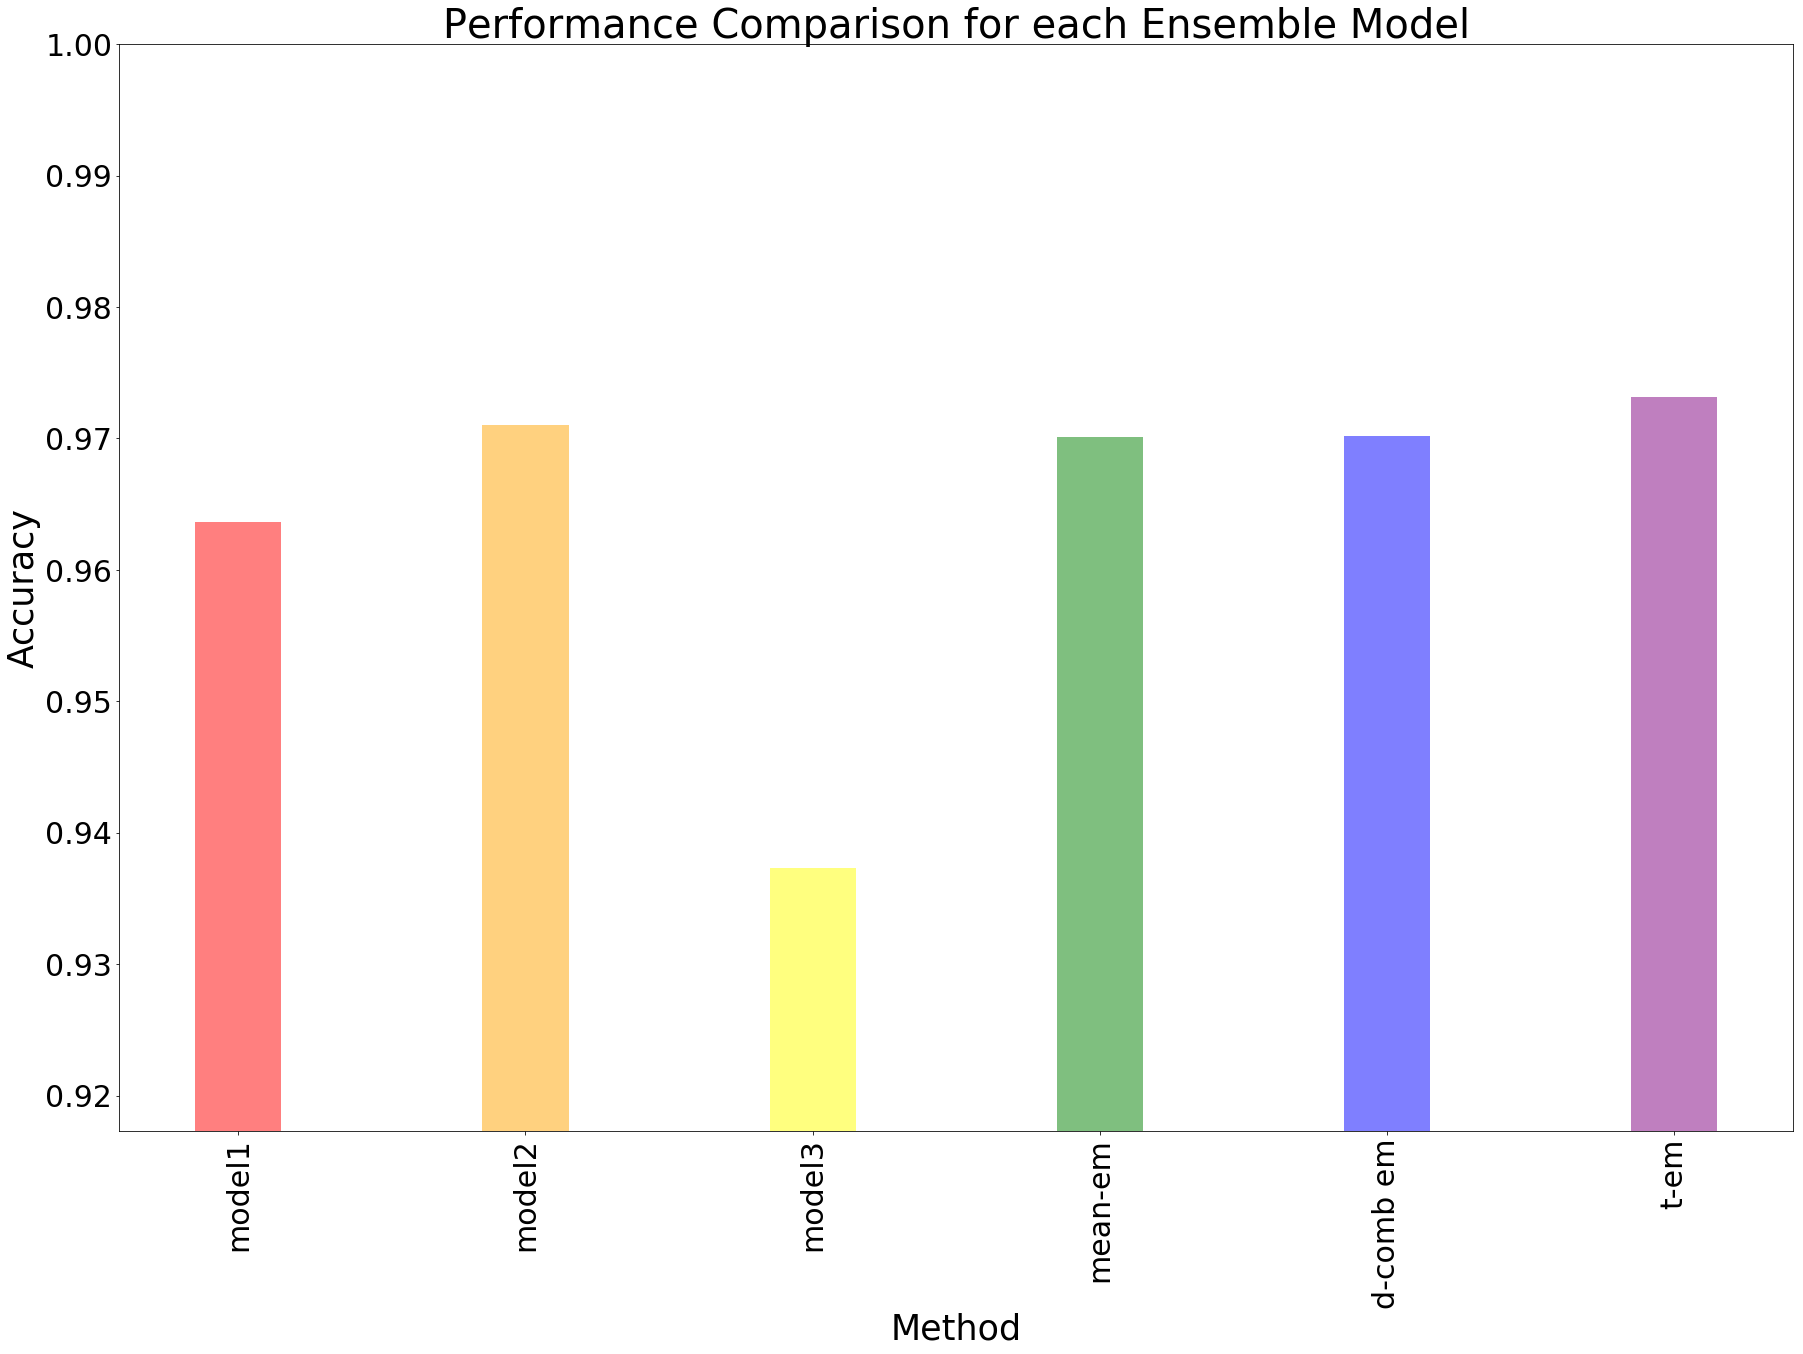

In [111]:
plot_bar_x()